<br>
<img align="center" src="imagenes/logo.png"  width="200" height="141">
<font size=36><center> Machine Learning con Python </center> </font>
<br>

<h1 align='center'> Modulo IV: Machine Learning </h1>
<h2 align='center'>  Análisis de Componentes Principales (PCA) </h2> 

---

# Aspectos Teóricos

## Introducción

El **análisis de componentes principales** (Principal Component Analysis PCA) es un método de reducción de dimensionalidad que permite simplificar la complejidad de espacios con múltiples dimensiones a la vez que conserva su información.

Supóngamos que existe una muestra con  $n$  individuos cada uno con  $p$  variables $( x_1 ,  x_2 , ...,  x_p )$, es decir, el espacio muestral tiene  $p$  dimensiones. PCA permite encontrar un número de variables no correlacionadas subyacentes  ($z<p$)  que explican aproximadamente lo mismo que las  $p$  variables originales. Donde antes se necesitaban  $p$  valores para caracterizar a cada individuo, ahora bastan  $z$  valores. Cada una de estas  $z$  nuevas variables recibe el nombre de **componente principal**.

## Interpretación geométrica de las componentes principales

Una forma intuitiva de entender el proceso de PCA es interpretar las componentes principales desde un punto de vista geométrico. Supongamos que tenemos un conjunto de observaciones para las que se dispone de dos variables $(x_1 ,  x_2 )$. El vector que define la primera componente principal ( $z_1$ ) sigue la dirección en la que las observaciones tienen más varianza (línea roja). La proyección de cada observación sobre esa dirección equivale al valor de la primera componente para dicha observación (principal component score,  zi1 ).
<img align="center" src="imagenes/pca1.png"  width="300" height="300">

La segunda componente ( $z_2$ ) sigue la segunda dirección en la que los datos muestran mayor varianza y que no está correlacionada con la primera componente. La condición de no correlación entre componentes principales equivale a decir que sus direcciones son perpendiculares/ortogonales.

<img align="center" src="imagenes/pca2.png"  width="300" height="300">

<div style="text-align: right"> Fuente: https://www.cienciadedatos.net </div>

## Pasos para el cálculo de las PCA

El PCA generalmente consta de algunos pasos importantes que se muestran a continuación:

1. **Escalar el conjunto de datos:** El escalado es un método para equiparar conjuntos de datos. Como resultado, el conjunto de datos es relativamente imparcial. Suponga que un conjunto de datos contiene datos sobre la edad y los ingresos de algunas personas. El rango de edad generalmente puede ser de 0 a 110, mientras que el ingreso / salario puede ser de hasta unos pocos dólares. Entonces, el rango de estas dos características, aunque muy diferente, no es razonable compararlas en la misma escala. El escalado se realiza para comparar un rango de características tan diferente en la misma escala. Este es un paso significativo en el análisis de componentes principales.


2. **Calcular la Matriz de covarianza:** La matriz de covarianza se deriva de la covarianza entre las diversas variables del conjunto de datos. Para decirlo de manera más simple, podemos entender fácilmente la relación entre dos variables por covarianza. En el caso de dos variables $X$ y $Y$ la covarianza viene dada por:
$$\mbox{Cov(X,Y)} = \frac{\displaystyle\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}{n}$$


3. **Calcular los valores propios y los vectores propios:** El ejemplo más simple de un vector propio es la transformación, pero no cambia de dirección. Los valores propios generalmente se determinan a partir de la matriz de covarianza. Los que contienen más covarianzas son los que contienen más información.


4. **Análisis de componentes principales (PCA):** Después de determinar los vectores propios y los valores propios, ordenaremos el valor obtenido en orden descendente. El valor propio más grande es el más significativo y forma el primer componente principal. De esta manera, el siguiente componente principal se forma secuencialmente utilizando los valores posteriores.

5. **Reducción de dimensión:** El primer componente principal contiene la información más importante sobre el conjunto de datos, por lo que los otros componentes principales contienen gradualmente información importante. Si queremos, podemos reducir la dimensionalidad eliminando los componentes que son menos importantes o que no tienen ningún papel.


## Práctica

Utilicemos el dataset de iris para determinar las componentes principales de este conjunto de datos y reducir la dimensión de los mismos.

### Importamos las librerías

In [76]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

### Importamos el dataset

In [10]:
datos = datasets.load_iris()

In [11]:
df = pd.DataFrame(data=datos.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])

In [13]:
df['especie'] = datos.target

In [17]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,especie
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


#### Número de observaciones y dimensión del espacio

In [31]:
print('Número de observaciones: {}, Dimensión del espacio: {}'.format(X.shape[0], X.shape[1]))

Número de observaciones: 150, Dimensión del espacio: 4


### Escalamos los datos

In [19]:
X = datos.data
y = datos.target

In [21]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [32]:
# datos escalados
print(X)

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0.04166667]
 [0.22222222 

### Componentes principales

In [35]:
pca = PCA()
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents , columns = ['pc-1', 'pc-2', 'pc-3','pc-4'])
principalDf

,pc-1,pc-2,pc-3,pc-4
0,-0.630703,0.107578,-0.018719,-0.007307
1,-0.622905,-0.104260,-0.049142,-0.032359
2,-0.669520,-0.051417,0.019644,-0.007434
3,-0.654153,-0.102885,0.023219,0.020114
4,-0.648788,0.133488,0.015116,0.011786
...,...,...,...,...
145,0.551462,0.059841,0.086283,-0.110092
146,0.407146,-0.171821,-0.004102,-0.065241
147,0.447143,0.037560,0.049546,-0.032743
148,0.488208,0.149678,0.239209,0.002864


### Varianza explicada por cada componente

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.84136038 0.11751808 0.03473561 0.00638592]


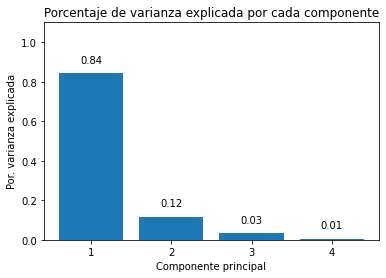

In [43]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(x = np.arange(pca.n_components_) + 1, height = pca.explained_variance_ratio_)

for x, y in zip(np.arange(len(df.columns)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(label,(x,y),textcoords="offset points",xytext=(0,10), ha='center')

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

### Porcentaje de varianza explicada acumulada

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.84136038 0.95887846 0.99361408 1.        ]


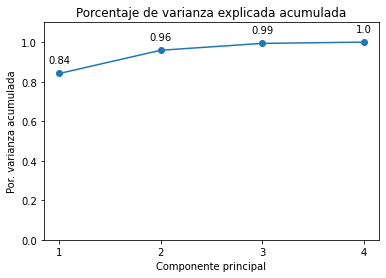

In [74]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(np.arange(1,len(df.columns)),prop_varianza_acum, marker = 'o')

for x, y in zip(np.arange(1,len(df.columns)), prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(1,len(df.columns)))
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Como podemos apreciar las dos primeras componentes explican el 96% de la variabilidad de los datos

### Información de cada componente

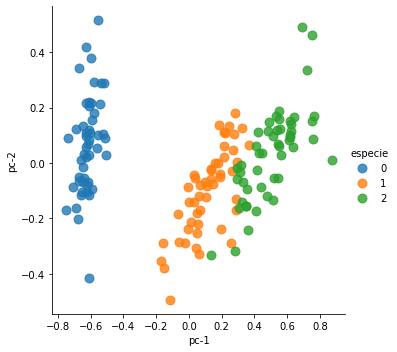

In [84]:
finalDf = pd.concat([principalDf, df[['especie']]], axis = 1)
finalDf.head()
sns.lmplot( x="pc-1", y="pc-2",data=finalDf, 
fit_reg=False,  hue='especie', legend=True,scatter_kws={"s": 80});